In [3]:
import tensorflow_hub as hub


ModuleNotFoundError: No module named 'tensorflow_hub'

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load images and labels
def load_images_and_labels(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path)
                img = img.resize((64, 64))  # Resize to match input size
                img_array = np.array(img) / 255.0  # Normalize image
                images.append(img_array)
                labels.append(category)
    return np.array(images), np.array(labels)

data_dir = r"C:\\Users\\thath\\OneDrive - University of Bradford\\Discipline-specific Artificial Intelligence Project\\EX\\EuroSAT_RGB"
images, labels = load_images_and_labels(data_dir)

# Encode labels
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
encoded_labels = np.array([label_to_index[label] for label in labels])

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model for image classification
def create_model(input_size=(64, 64, 3), num_classes=10):
    base_model = tf.keras.applications.ResNet50(input_shape=input_size, include_top=False, weights="imagenet")
    
    # Freeze the ResNet layers
    for layer in base_model.layers:
        layer.trainable = False
    
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation="relu")(x)
    output = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    return model

# Create and summarize the model
model = create_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 106s 182ms/step - accuracy: 0.2716 - loss: 1.9957 - val_accuracy: 0.3644 - val_loss: 1.5594
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 98s 182ms/step - accuracy: 0.4427 - loss: 1.4874 - val_accuracy: 0.4661 - val_loss: 1.4269
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 98s 182ms/step - accuracy: 0.4840 - loss: 1.3723 - val_accuracy: 0.4863 - val_loss: 1.3010
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 97s 181ms/step - accuracy: 0.5106 - loss: 1.3000 - val_accuracy: 0.5129 - val_loss: 1.2326
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 111s 207ms/step - accuracy: 0.5427 - loss: 1.2398 - val_accuracy: 0.5393 - val_loss: 1.2837
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 103s 191ms/step - accuracy: 0.5549 - loss: 1.2243 - val_accuracy: 0.5693 - val_loss: 1.1611
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 103s 192ms/step - accuracy: 0.5650 - loss: 1.1815 - val_accuracy: 0.5815 - val_loss: 1.1542
Epoch 8/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 104s 193ms/step - accuracy: 0.5682 - lo

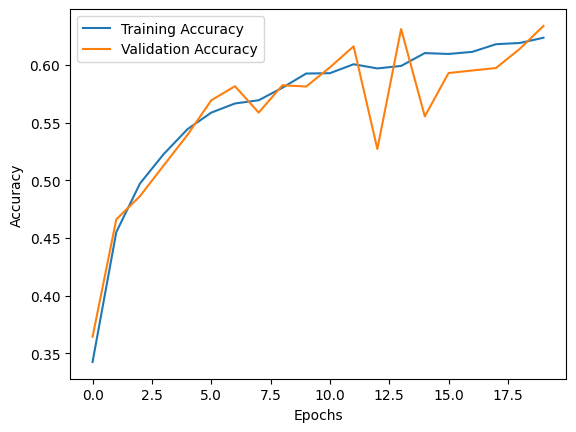

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model_save_path = r"C:\\Users\\thath\\OneDrive - University of Bradford\\Discipline-specific Artificial Intelligence Project\\D Test\\1\\deeplab_model.keras"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
import pickle

history_save_path = r"C:\\Users\\thath\\OneDrive - University of Bradford\\Discipline-specific Artificial Intelligence Project\\D Test\\1\\training_history.pkl"
with open(history_save_path, 'wb') as f:
    pickle.dump(history.history, f)

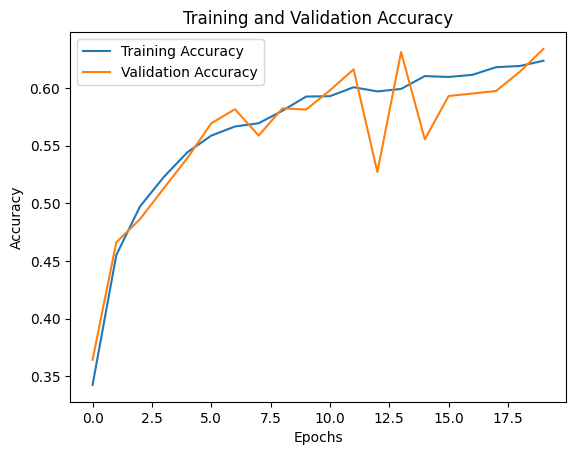

In [9]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
